In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [9]:
train_df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/test.csv')
test_labels = pd.read_csv('Dataset/sample_submission.csv')
print(all(test_labels['Id'] == test_df['Id']))
test_df['SalePrice'] = test_labels['SalePrice']

True


In [10]:
features = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'FullBath', 'HalfBath', 'GarageCars', 'GarageArea',
    'GrLivArea', 'TotRmsAbvGrd', 'SalePrice'
]

train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0.0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0.0)
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0.0)
test_df['GarageCars'] = test_df['GarageCars'].fillna(0.0)
test_df['GarageArea'] = test_df['GarageArea'].fillna(0.0)

train_df = train_df[features]
test_df = test_df[features]

In [11]:
print(np.isnan(train_df).sum())
# print(np.isnan(test_df).sum())

OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
HalfBath        0
GarageCars      0
GarageArea      0
GrLivArea       0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


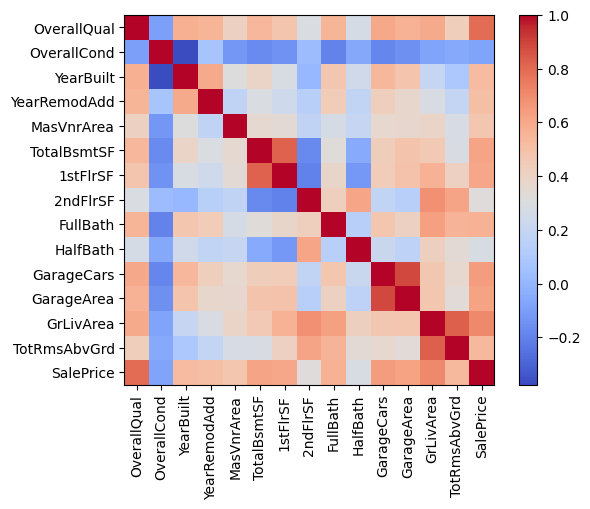

In [12]:
corr_matrix = train_df.corr()
plt.imshow(corr_matrix.to_numpy(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)

plt.show()

In [13]:
x_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=.2, random_state=42)

print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Validation: {x_validation.shape}, {y_validation.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')

Train: (1168, 14), (1168,)
Validation: (292, 14), (292,)
Test: (1459, 14), (1459,)


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(.0001),
    loss=tf.keras.losses.mae
)

In [16]:
result = model.fit(x_train, y_train, epochs=200, validation_data=(x_validation, y_validation))

Epoch 1/200
37/37 [==============================] - 1s 5ms/step - loss: 181291.9844 - val_loss: 178497.7656
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 180897.0312 - val_loss: 178090.7188
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 180430.1719 - val_loss: 177542.1094
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 179763.8594 - val_loss: 176763.1406
Epoch 5/200
37/37 [==============================] - 0s 2ms/step - loss: 178837.8125 - val_loss: 175686.6719
Epoch 6/200
37/37 [==============================] - 0s 2ms/step - loss: 177552.4219 - val_loss: 174188.2969
Epoch 7/200
37/37 [==============================] - 0s 2ms/step - loss: 175756.8750 - val_loss: 172091.9219
Epoch 8/200
37/37 [==============================] - 0s 2ms/step - loss: 173237.9062 - val_loss: 169164.8125
Epoch 9/200
37/37 [==============================] - 0s 2ms/step - loss: 169760.0000 - val_loss: 165157.9844
Epoch 10/200
37/37 

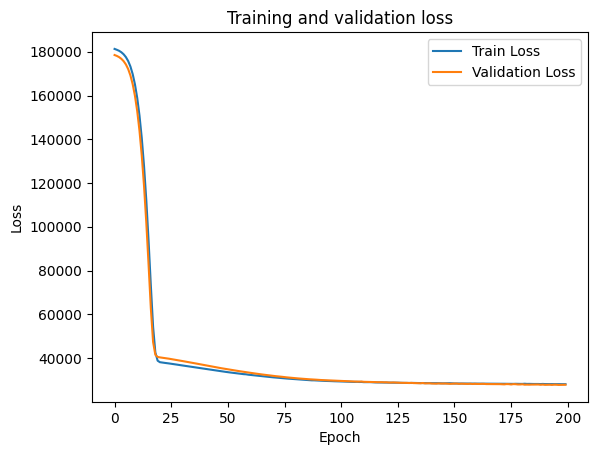

In [17]:
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [18]:
result = model.evaluate(x_test, y_test)

46/46 [==============================] - 0s 800us/step - loss: 44110.7031


In [19]:
result

44110.703125

In [20]:
sample_data = np.array([
    7, 5, 2015, 2020, 150, 0, 1000, 0, 1, 0, 1, 500, 900, 2
])
sample_data = sample_data.reshape(1, -1)
result = model.predict(sample_data)

1/1 [==============================] - 0s 73ms/step


In [21]:
result

array([[93785.]], dtype=float32)

In [167]:
model.save('model/model.h5')

C:\Users\Eiliya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [168]:
model.save('model/model.keras')

In [22]:
result = model.predict(x_test)

46/46 [==============================] - 0s 733us/step


In [29]:
outputs = pd.DataFrame(result, columns=['SalePrice'])
test_df_ids = pd.read_csv('Dataset/test.csv', usecols=['Id'])
outputs['Id'] = test_df_ids['Id']

In [30]:
outputs.to_csv('Predicted.csv', index=False)